In [1]:
from plotting_loading import *

/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:71: RuntimeWarning: Mean of empty slice
  anc_s[cond][edge] = np.nanmean(td['s'])
/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:82: RuntimeWarning: Mean of empty slice
  anc_s_clones[cond][edge] = np.nanmean(td['s'])


P1_YPD_30C All, Gen 1.9927335101475135e-06
P1_YPD_30C All, Fitness 3.6422882247463304e-06
P3_SC_37C All, Gen 0.12560163113497894
P3_SC_37C All, Fitness 0.18427843948075207


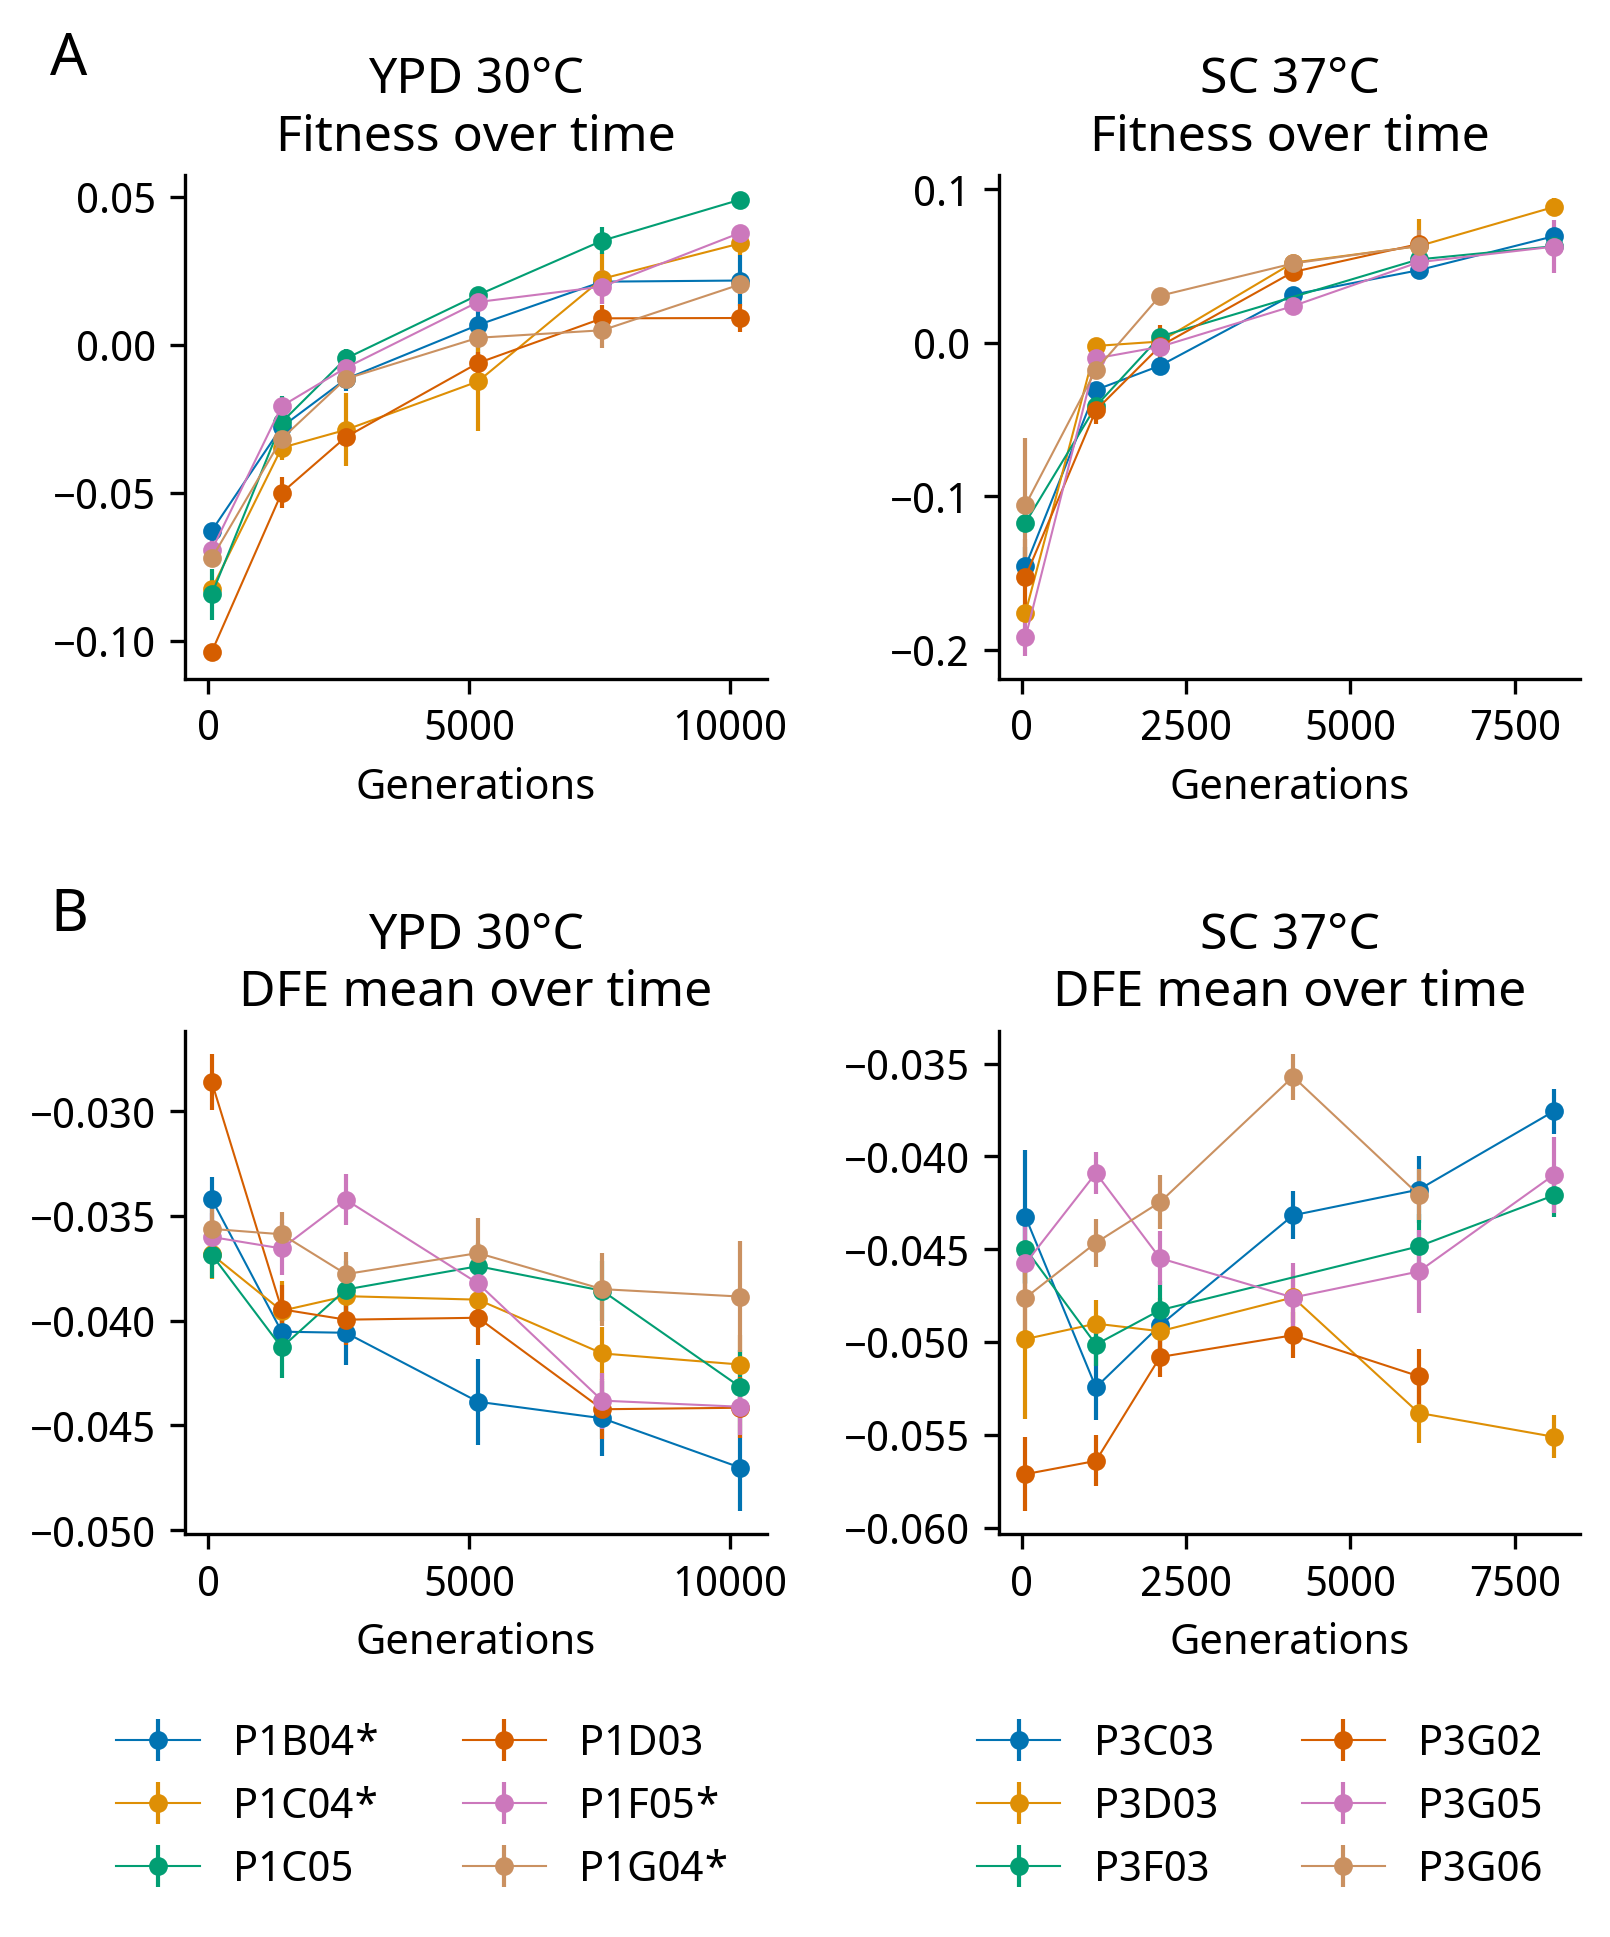

In [2]:
def fig1(dfe_df, outname, ls='-'):
    fig, subps = pl.subplots(2, 2, figsize=(6,6), dpi=300)
    pl.subplots_adjust(wspace=0.4, hspace=0.7)
    for i in range(2):
        cond = conditions[i]
        td = dfe_df[dfe_df.Cond==cond]
        for pop in cond_pops[cond.split('_')[0]]:
            ttd = td[td.Pop==pop].sort_values('Gen')
            gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
            if sci_stats.linregress(gen_rec, ttd['DFE_mean'])[3]<0.05:
                lab = pop+'*'
            else:
                lab = pop
            if len(ttd[ttd['Fitness_std']==0]) > 0:
                print('Missing errors for', cond, pop, list(ttd[ttd['Fitness_std']==0]['Gen']))
            subps[1][i].errorbar(x=gen_rec, y=ttd['DFE_mean'], yerr=ttd['DFE_mean_std'], linestyle=ls, marker='.', markersize=7, elinewidth=1, linewidth=0.5, color=color_map[pop], label=lab)
            subps[0][i].errorbar(x=gen_rec, y=ttd['Fitness'], yerr=ttd['Fitness_std'], linestyle=ls, marker='.', markersize=7, elinewidth=1, linewidth=0.5, color=color_map[pop], label=pop)
            #print(cond, pop, sci_stats.linregress(ttd['Gen'], ttd['DFE_mean'])[3])
        print(cond, 'All, Gen', sci_stats.linregress(td['Gen'], td['DFE_mean'])[3])
        print(cond, 'All, Fitness', sci_stats.linregress(td['Fitness'], td['DFE_mean'])[3])
        subps[0][i].set_title(cond_to_title[cond]+'\nFitness over time')
        subps[1][i].set_title(cond_to_title[cond]+'\nDFE mean over time')
        subps[0][i].set_xlabel('Generations')
        subps[1][i].set_xlabel('Generations')
        subps[1][i].legend(frameon=False, bbox_to_anchor=(1, -0.3), ncol=2)

    #subps[0][0].set_ylabel('Fitness')
    #subps[1][0].set_ylabel('DFE mean')
    subps[0][0].annotate('A', fontsize=14, xy=(-0.2, 1.2), xycoords="axes fraction", horizontalalignment="center")
    subps[1][0].annotate('B', fontsize=14, xy=(-0.2, 1.2), xycoords="axes fraction", horizontalalignment="center")

    sns.despine()
    fig.savefig(outname, background='transparent', bbox_inches='tight', pad_inches=0.1)

fig1(vtn_dfe, '../../Figures/DFEs.pdf')

P1_YPD_30C All, Gen 3.845060369512634e-08
P1_YPD_30C All, Fitness 4.41352492028405e-08
Missing errors for P3_SC_37C P3G05 [70, 70]
P3_SC_37C All, Gen 0.6212679141844548
P3_SC_37C All, Fitness 0.7781672078450916


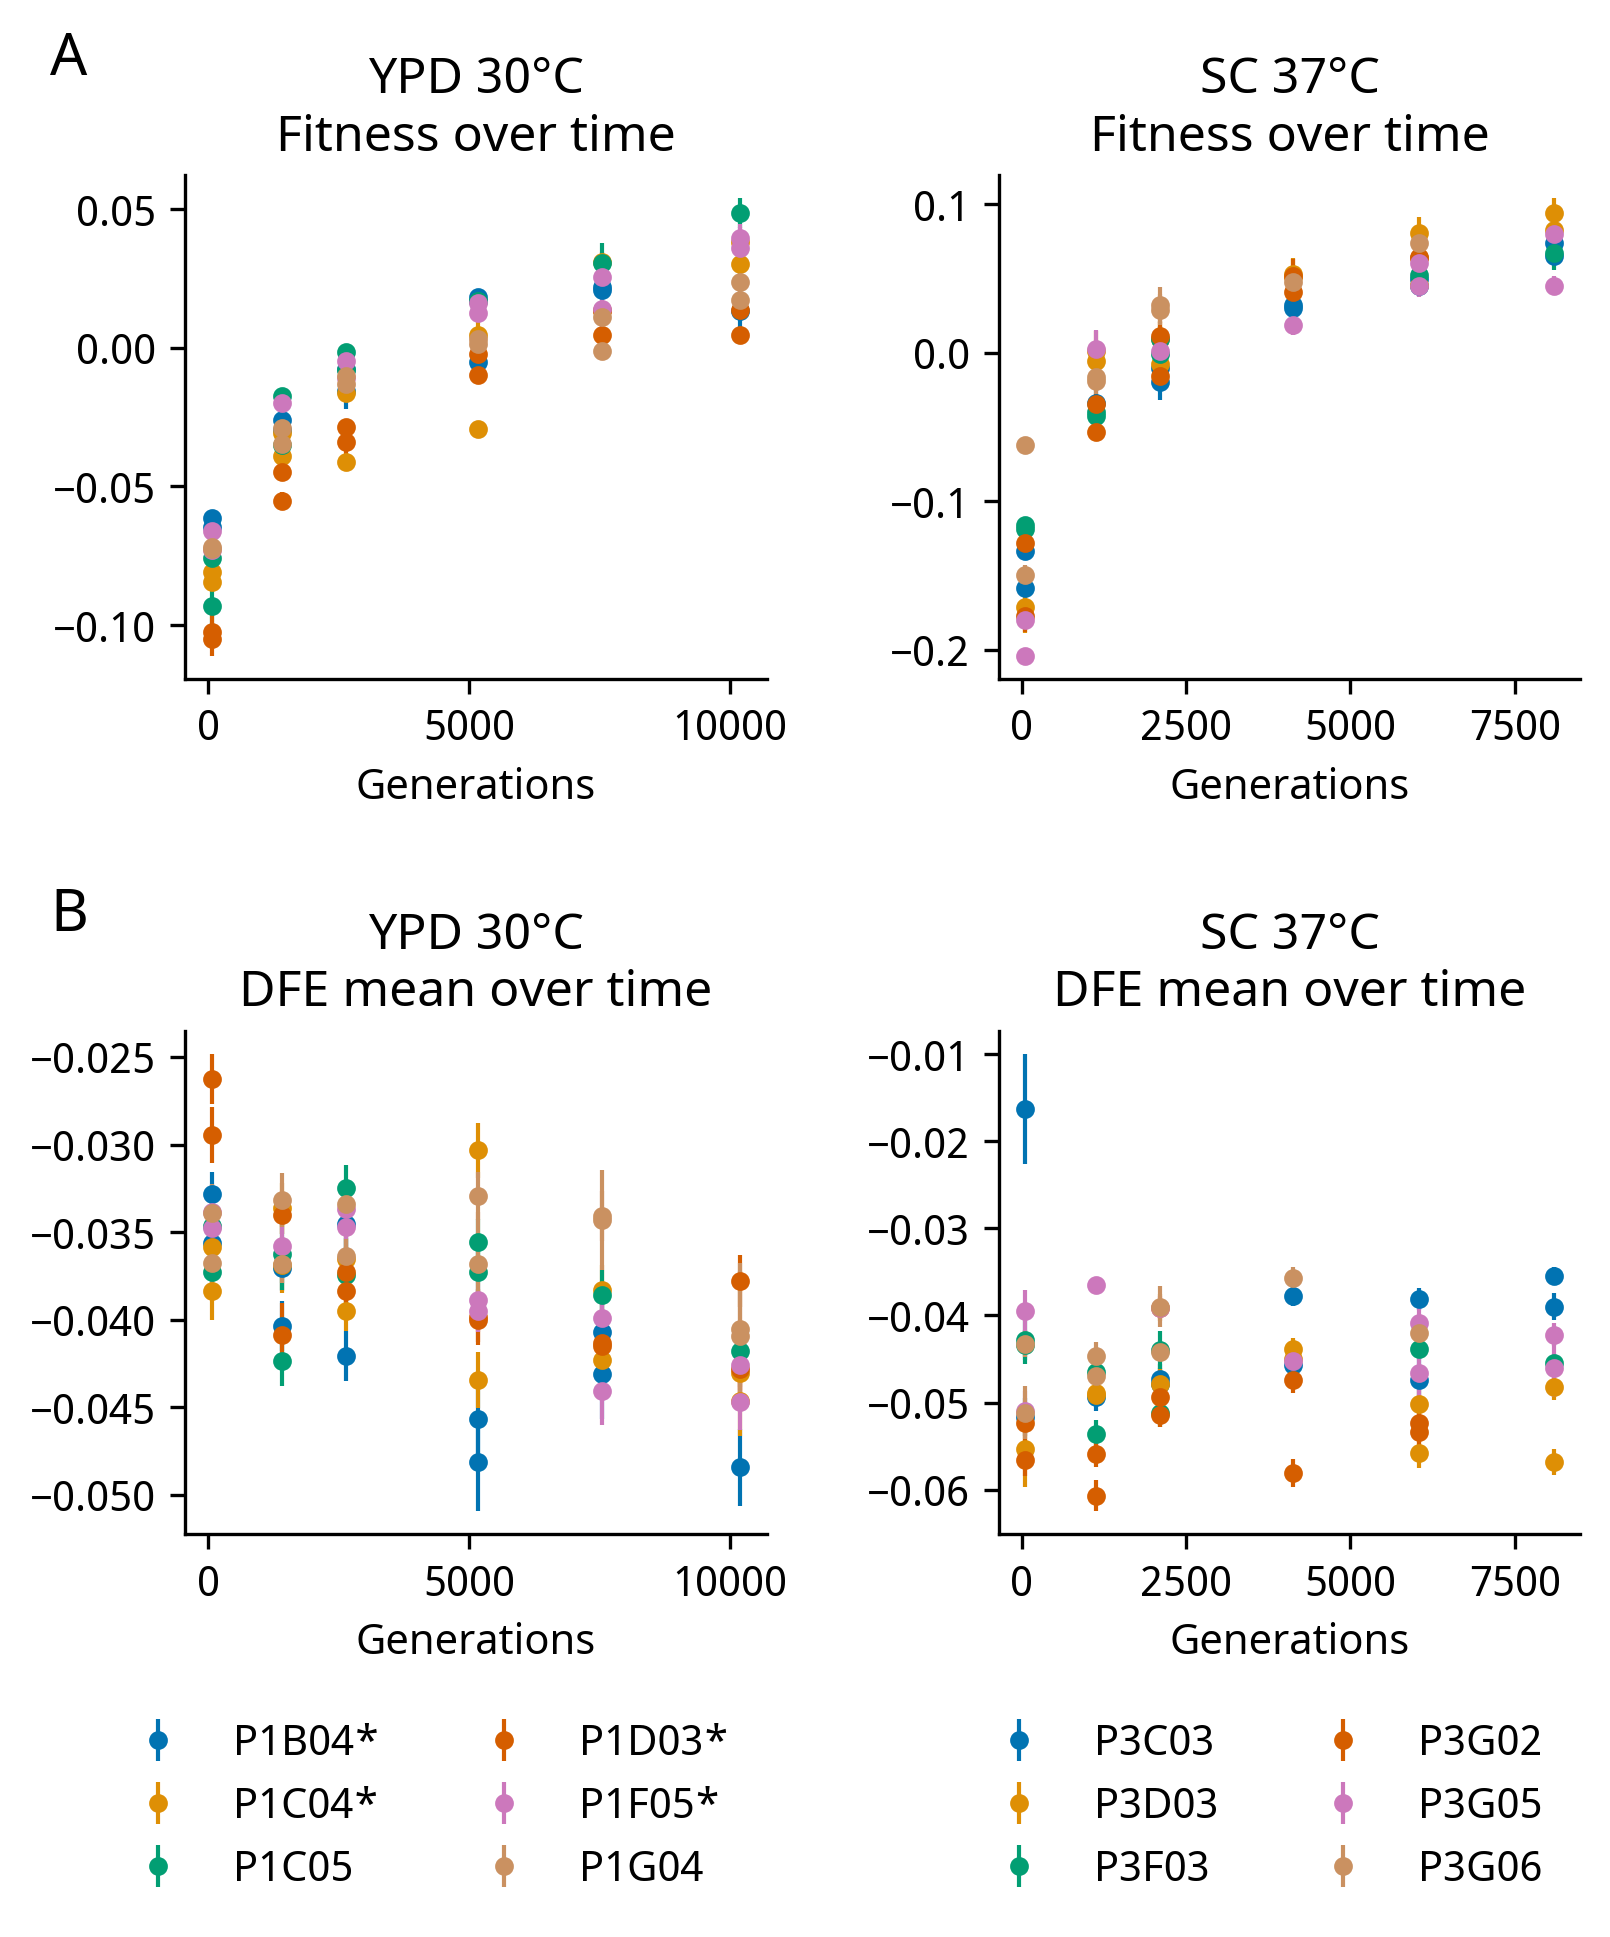

In [3]:
fig1(vtn_clones_dfe, '../../Figures/supp_figs_clones/DFEs_clones.pdf', ls='')

P1_YPD_30C 36
P3_SC_37C 33


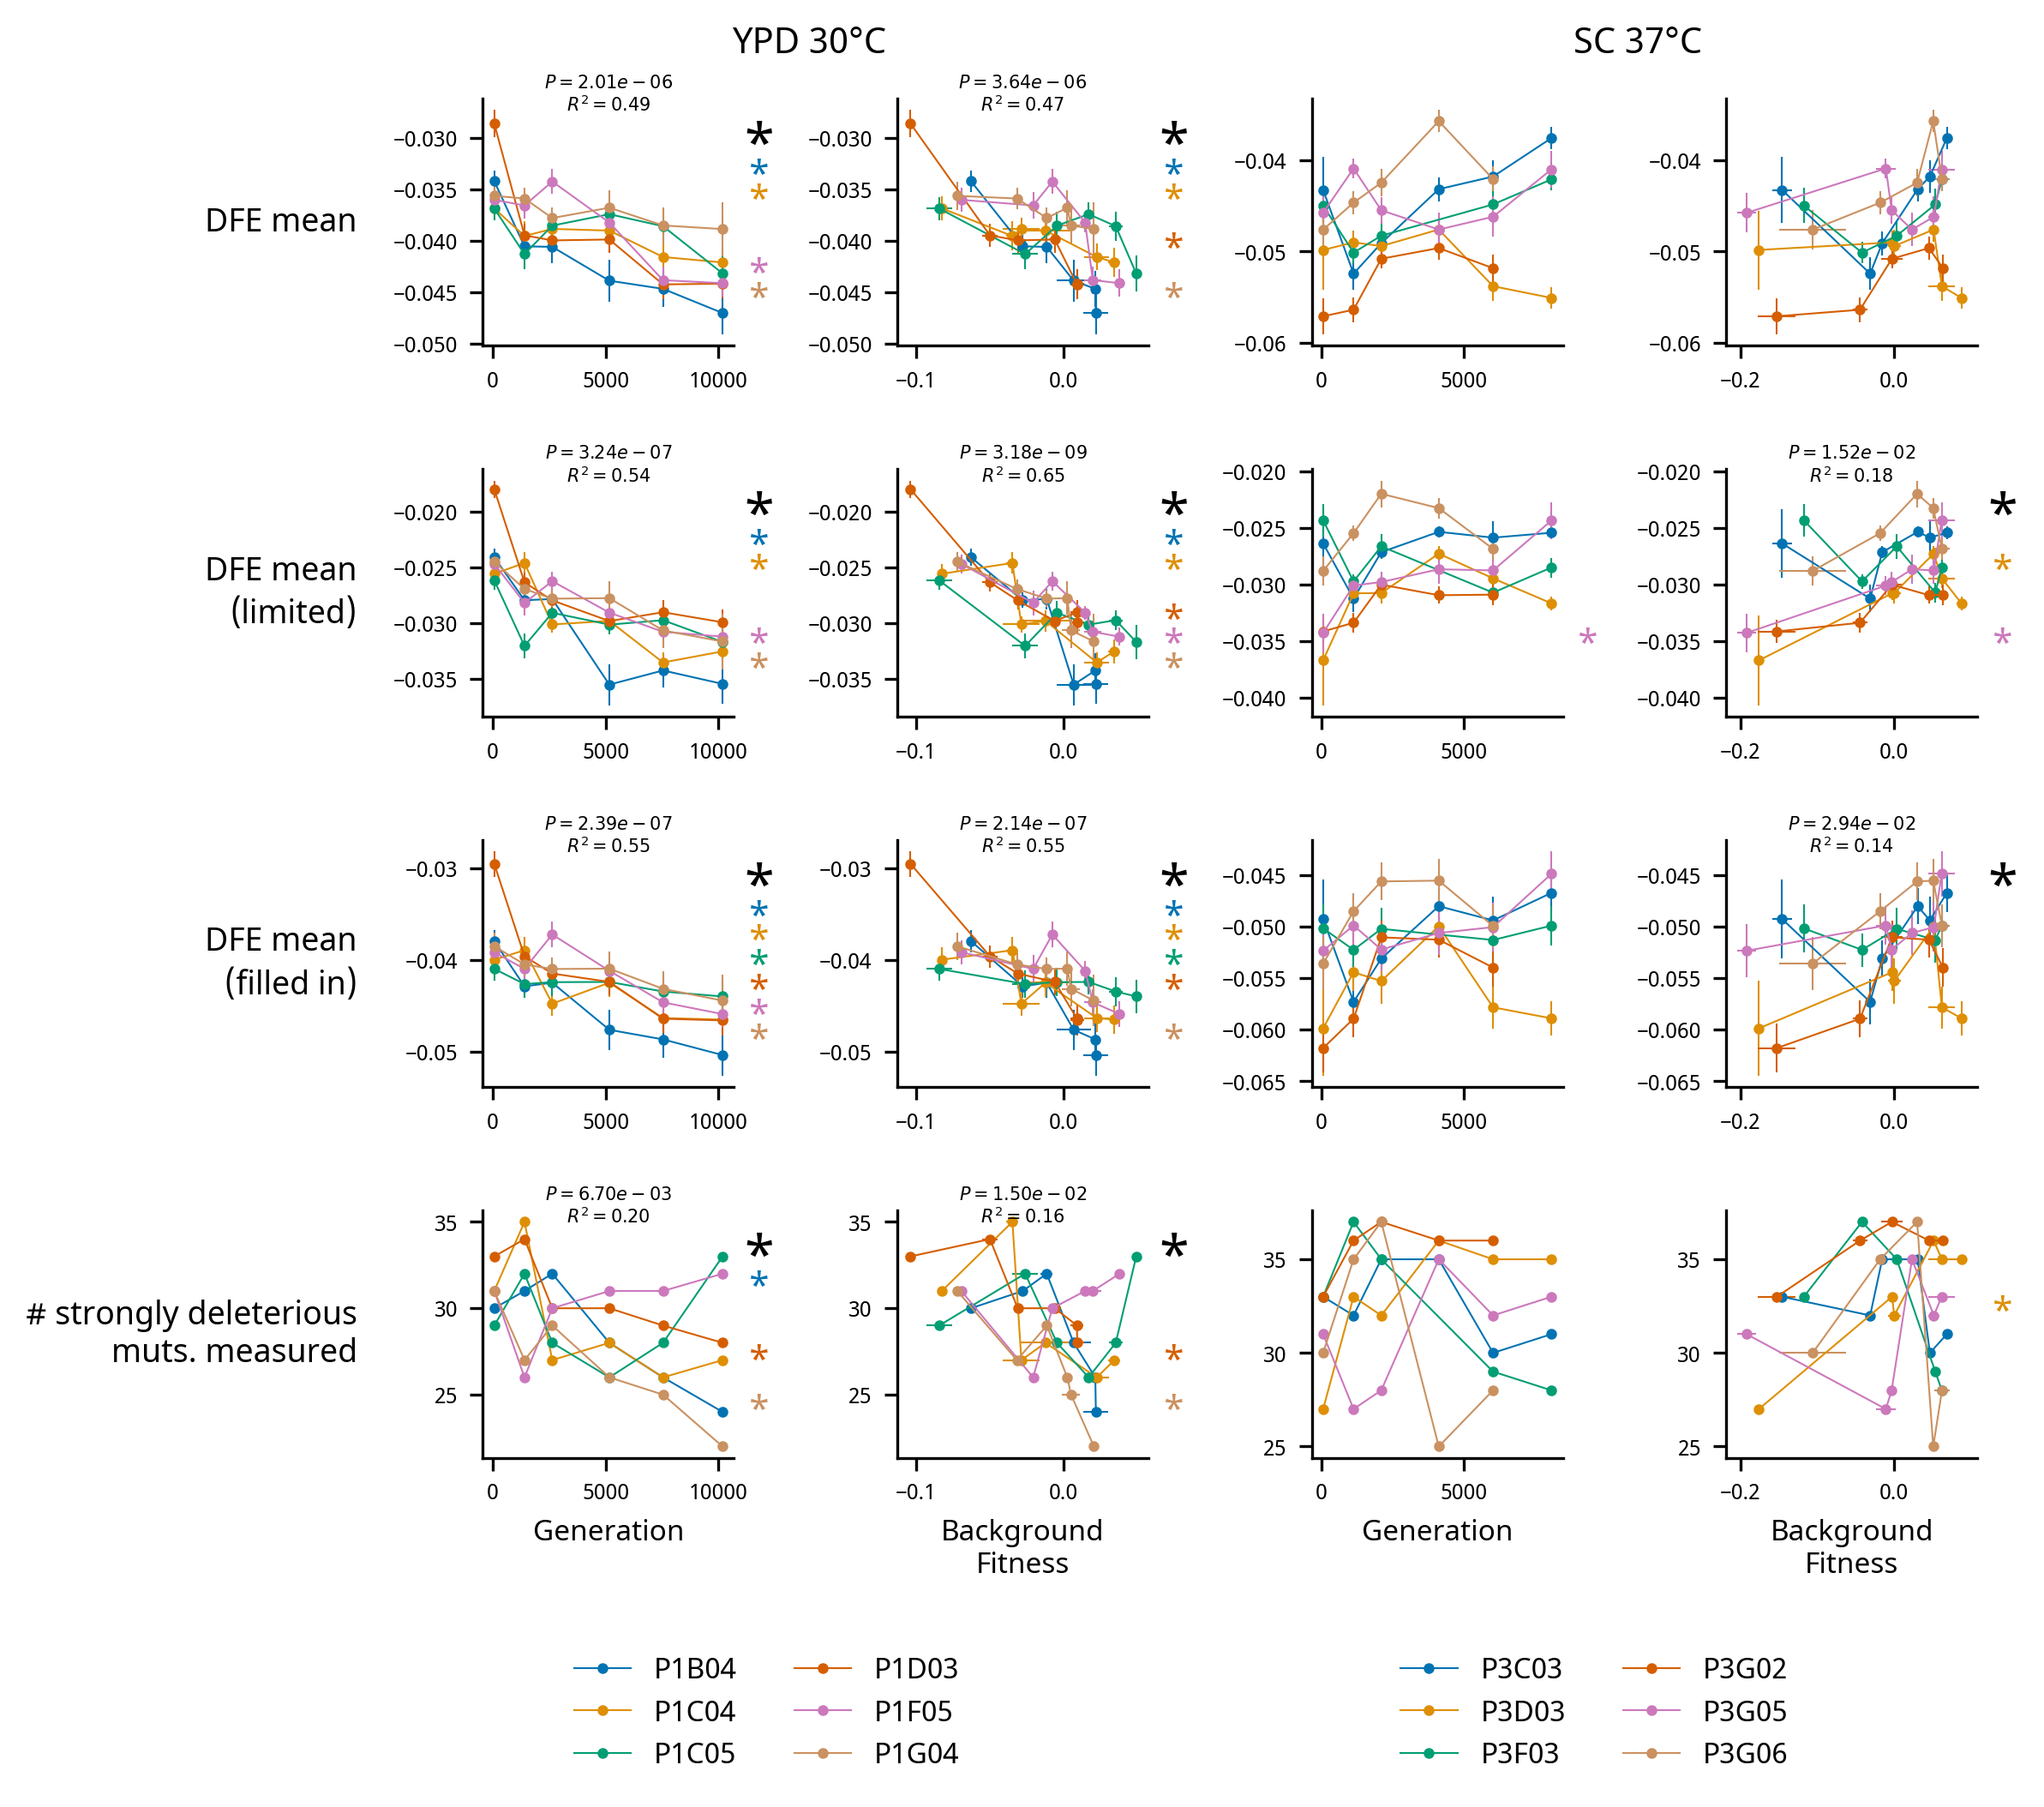

In [4]:
def line_plot(sub, xvals, yvals, c, label, xerr=None, yerr=None, ms=4, elw=0.5, ls='-'):
    sub.errorbar(x=xvals, y=yvals, xerr=xerr, yerr=yerr, linestyle=ls, marker='.', markersize=ms, elinewidth=elw, linewidth=0.5, color=c, label=label)
    if sci_stats.linregress(xvals, yvals)[3] < 0.05:
        sub.annotate('*', xy=(1.1, 0.65-colors.index(c)*0.1), xycoords='axes fraction', color=c, horizontalalignment='center')
        
def two_line_plots(td, cond, subs, yvar, yerr_var=None, ls=''):
    tmp = td[pd.notnull(td[yvar])]
    for pop in cond_pops[cond.split('_')[0]]:
        ttd = tmp[tmp['Pop']==pop].sort_values('Gen')
        gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
        if yerr_var:
            yerrs = ttd[yerr_var]
        else:
            yerrs = None
        line_plot(subs[0], gen_rec, ttd[yvar], color_map[pop], pop, yerr=yerrs, ls=ls)
        line_plot(subs[1], ttd['Fitness'], ttd[yvar], color_map[pop], pop, xerr=ttd['Fitness_std'], yerr=yerrs, ls=ls)
    lr_gen = sci_stats.linregress([gen_fixer[g][cond.split('_')[0]] for g in tmp['Gen']], tmp[yvar])
    if lr_gen[3] < 0.05:
        subs[0].annotate('*', xy=(1.1, 0.75), xycoords='axes fraction', color='k', size=15, horizontalalignment='center')
        subs[0].annotate(f'$P={lr_gen[3]:.2e}$\n$R^2={lr_gen[2]**2:.2f}$', xy=(0.5, 0.95), xycoords='axes fraction', color='k', size=5, horizontalalignment='center')
    lr_fit = sci_stats.linregress(tmp['Fitness'], tmp[yvar])
    if lr_fit[3] < 0.05:
        subs[1].annotate('*', xy=(1.1, 0.75), xycoords='axes fraction', color='k', size=15, horizontalalignment='center')
        subs[1].annotate(f'$P={lr_fit[3]:.2e}$\n$R^2={lr_fit[2]**2:.2f}$', xy=(0.5, 0.95), xycoords='axes fraction', color='k', size=5, horizontalalignment='center')
    subs[0].tick_params(labelsize=6)
    subs[1].tick_params(labelsize=6)
    
        
def fig1s_missing_measurements(dfe_df, outname, ls='-'):
    fig, subs = pl.subplots(4, 4, figsize=(7.5, 7), dpi=300)
    pl.subplots_adjust(wspace=0.65, hspace=0.5)
    ms = 3 
    for i in range(2):
        cond = conditions[i]
        td = dfe_df[dfe_df.Cond==conditions[i]]
        print(cond, len(td))
        two_line_plots(td, cond, subs[0][i*2:i*2+2], 'DFE_mean', yerr_var='DFE_mean_std', ls=ls)
        two_line_plots(td, cond, subs[1][i*2:i*2+2], 'shared_DFE_mean', yerr_var='shared_DFE_mean_std', ls=ls)
        two_line_plots(td, cond, subs[2][i*2:i*2+2], 'filled_DFE_mean', yerr_var='filled_DFE_mean_std', ls=ls)
        two_line_plots(td, cond, subs[3][i*2:i*2+2], 'del_s_count', ls=ls)
        subs[3][i*2].legend(frameon=False, bbox_to_anchor=(2, -0.7), ncol=2, fontsize=8)
        subs[0][i*2].set_title(cond_to_title[conditions[i]], x=1.3, fontsize=10, y=1.1)
        subs[3][i*2].set_xlabel('Generation', fontsize=8)
        subs[3][i*2+1].set_xlabel('Background\nFitness', fontsize=8)

    subs[0][0].annotate('DFE mean', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[3][0].annotate('# strongly deleterious\nmuts. measured', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[1][0].annotate('DFE mean\n(limited)', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[2][0].annotate('DFE mean\n(filled in)', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    sns.despine()
    fig.savefig(outname, background='transparent', bbox_inches='tight', pad_inches=0.1)

fig1s_missing_measurements(vtn_dfe, '../../Figures/supp_figs/DFE_missing_measurements.pdf')

P1_YPD_30C 68
P3_SC_37C 57


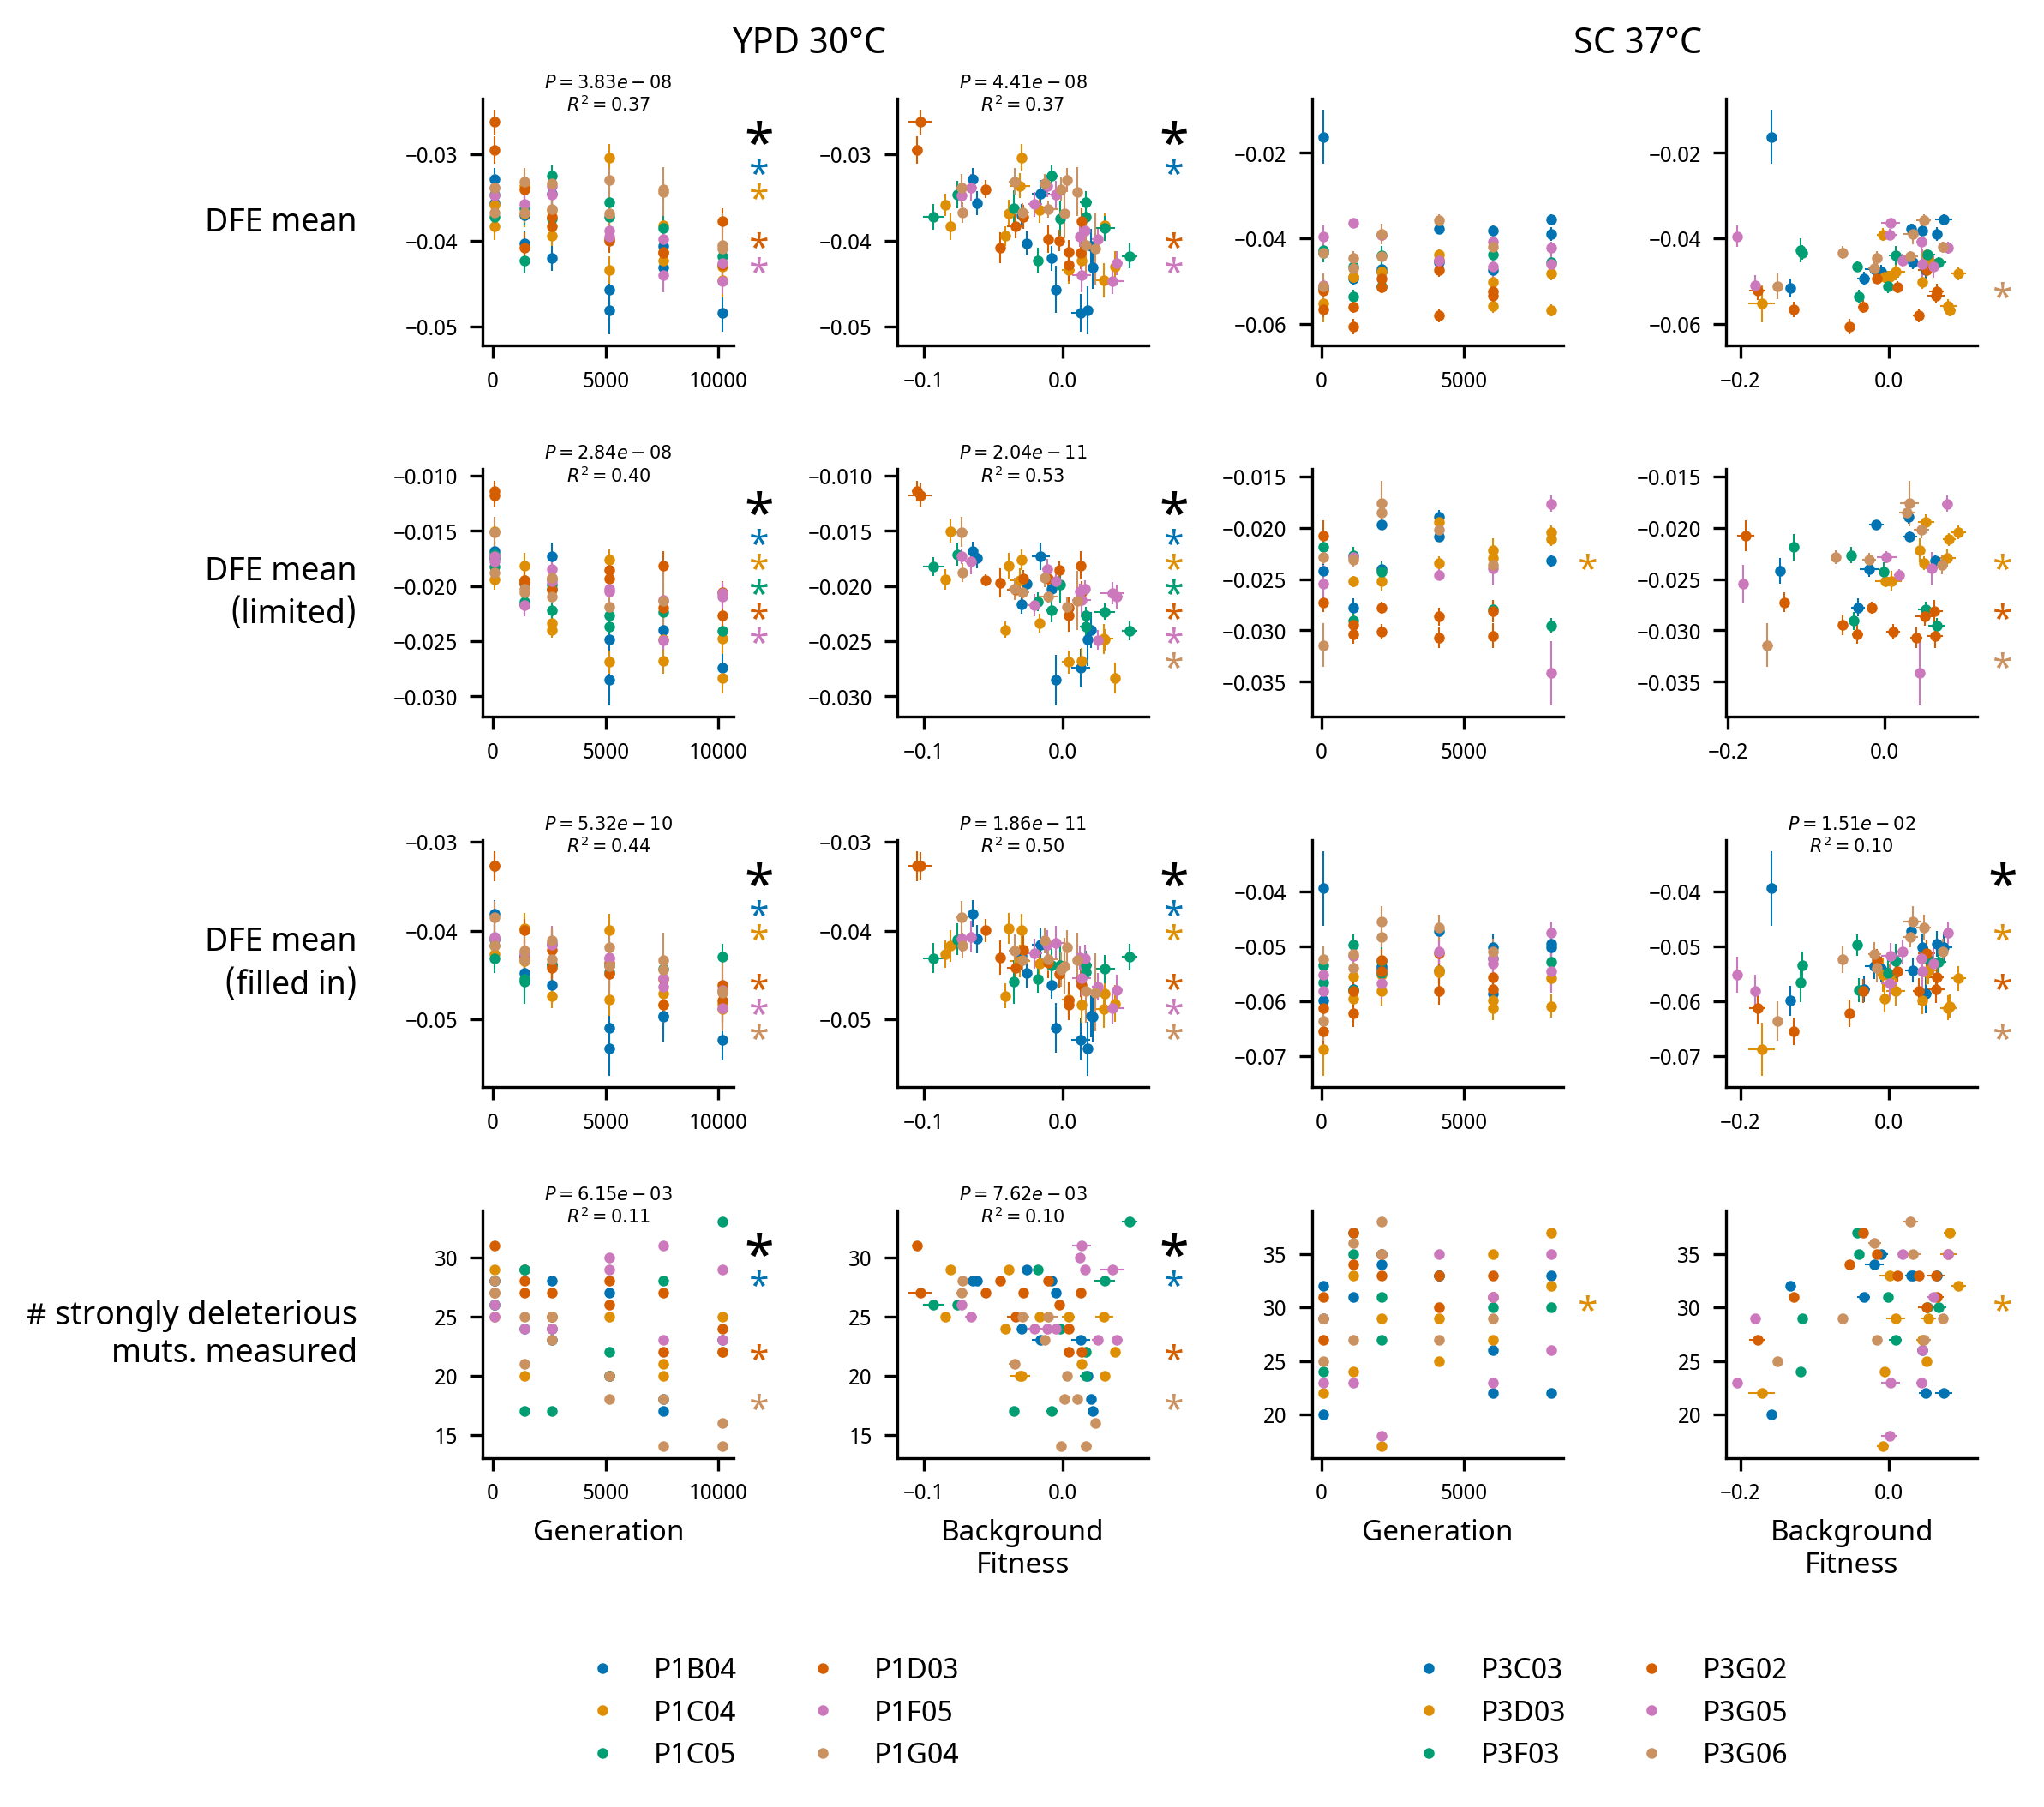

In [5]:
fig1s_missing_measurements(vtn_clones_dfe, '../../Figures/supp_figs_clones/DFE_missing_measurements_clones.pdf', ls='')

P1_SC_37C 35


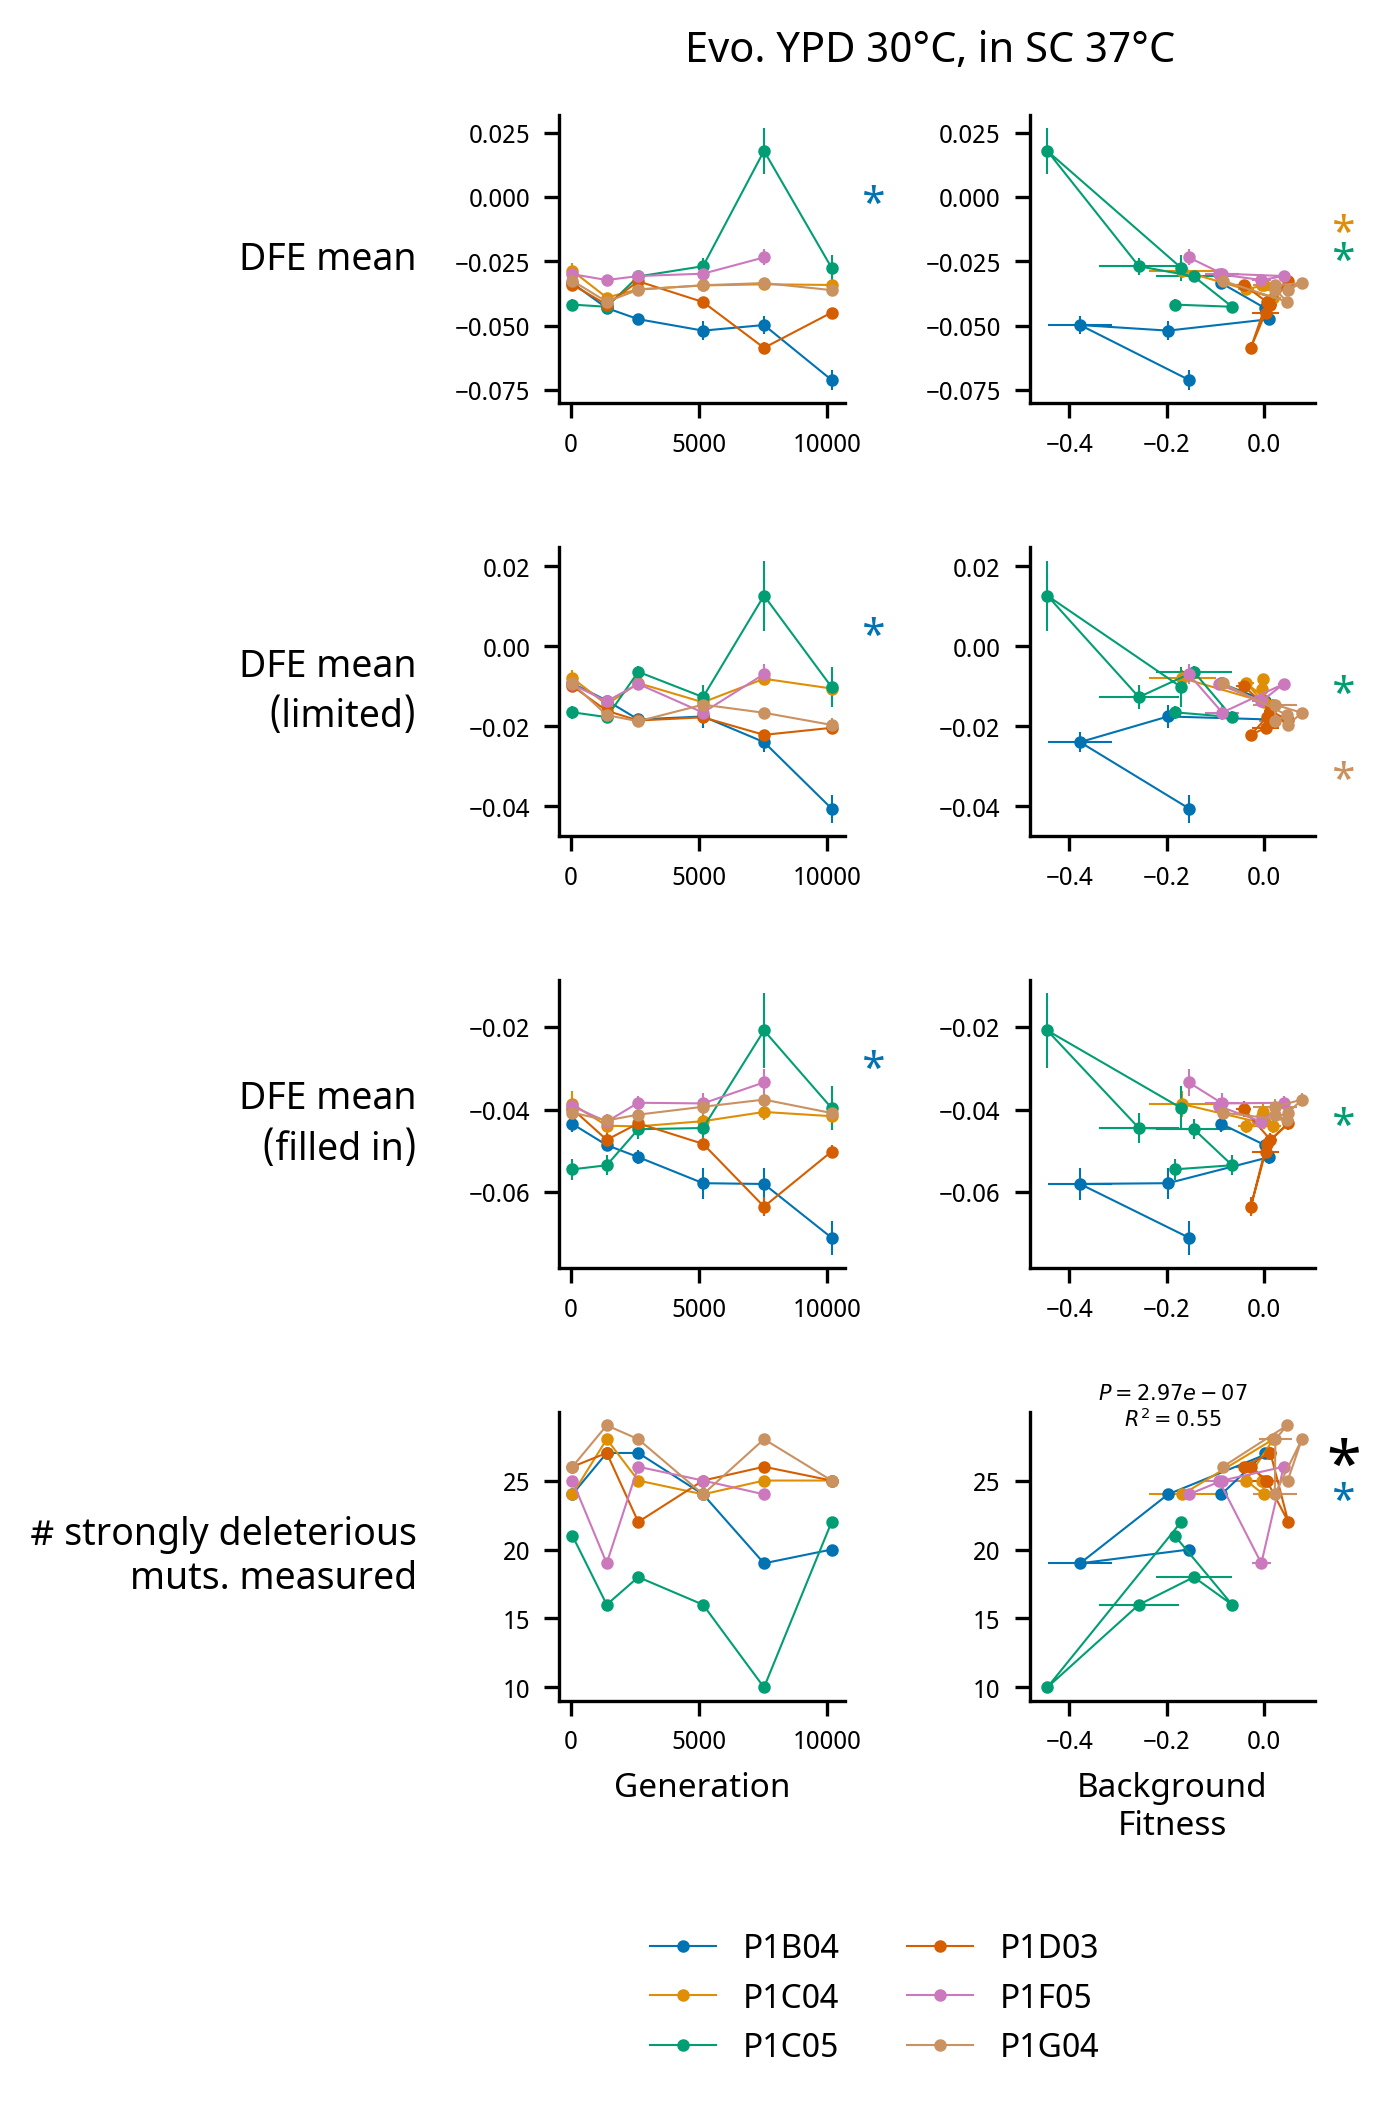

In [6]:
def p1sc_fig1s_missing_measurements(dfe_df, ls='-'):
    fig, subs = pl.subplots(4, 2, figsize=(3.25, 7), dpi=300)
    pl.subplots_adjust(wspace=0.65, hspace=0.5)
    ms = 3 
    cond = 'P1_SC_37C'
    td = dfe_df[dfe_df.Cond==cond]
    print(cond, len(td))
    two_line_plots(td, cond, subs[0], 'DFE_mean', yerr_var='DFE_mean_std', ls=ls)
    two_line_plots(td, cond, subs[1], 'shared_DFE_mean', yerr_var='shared_DFE_mean_std', ls=ls)
    two_line_plots(td, cond, subs[2], 'filled_DFE_mean', yerr_var='filled_DFE_mean_std', ls=ls)
    two_line_plots(td, cond, subs[3], 'del_s_count', ls=ls)
    subs[3][0].legend(frameon=False, bbox_to_anchor=(2, -0.7), ncol=2, fontsize=8)
    subs[0][0].set_title(cond_to_title[cond], x=1.3, fontsize=10, y=1.1)
    subs[3][0].set_xlabel('Generation', fontsize=8)
    subs[3][1].set_xlabel('Background\nFitness', fontsize=8)

    subs[0][0].annotate('DFE mean', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[3][0].annotate('# strongly deleterious\nmuts. measured', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[1][0].annotate('DFE mean\n(limited)', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    subs[2][0].annotate('DFE mean\n(filled in)', xy=(-0.5, 0.5), xycoords="axes fraction", ha='right', va='center', fontsize=9)
    sns.despine()

p1sc_fig1s_missing_measurements(vtn_dfe)

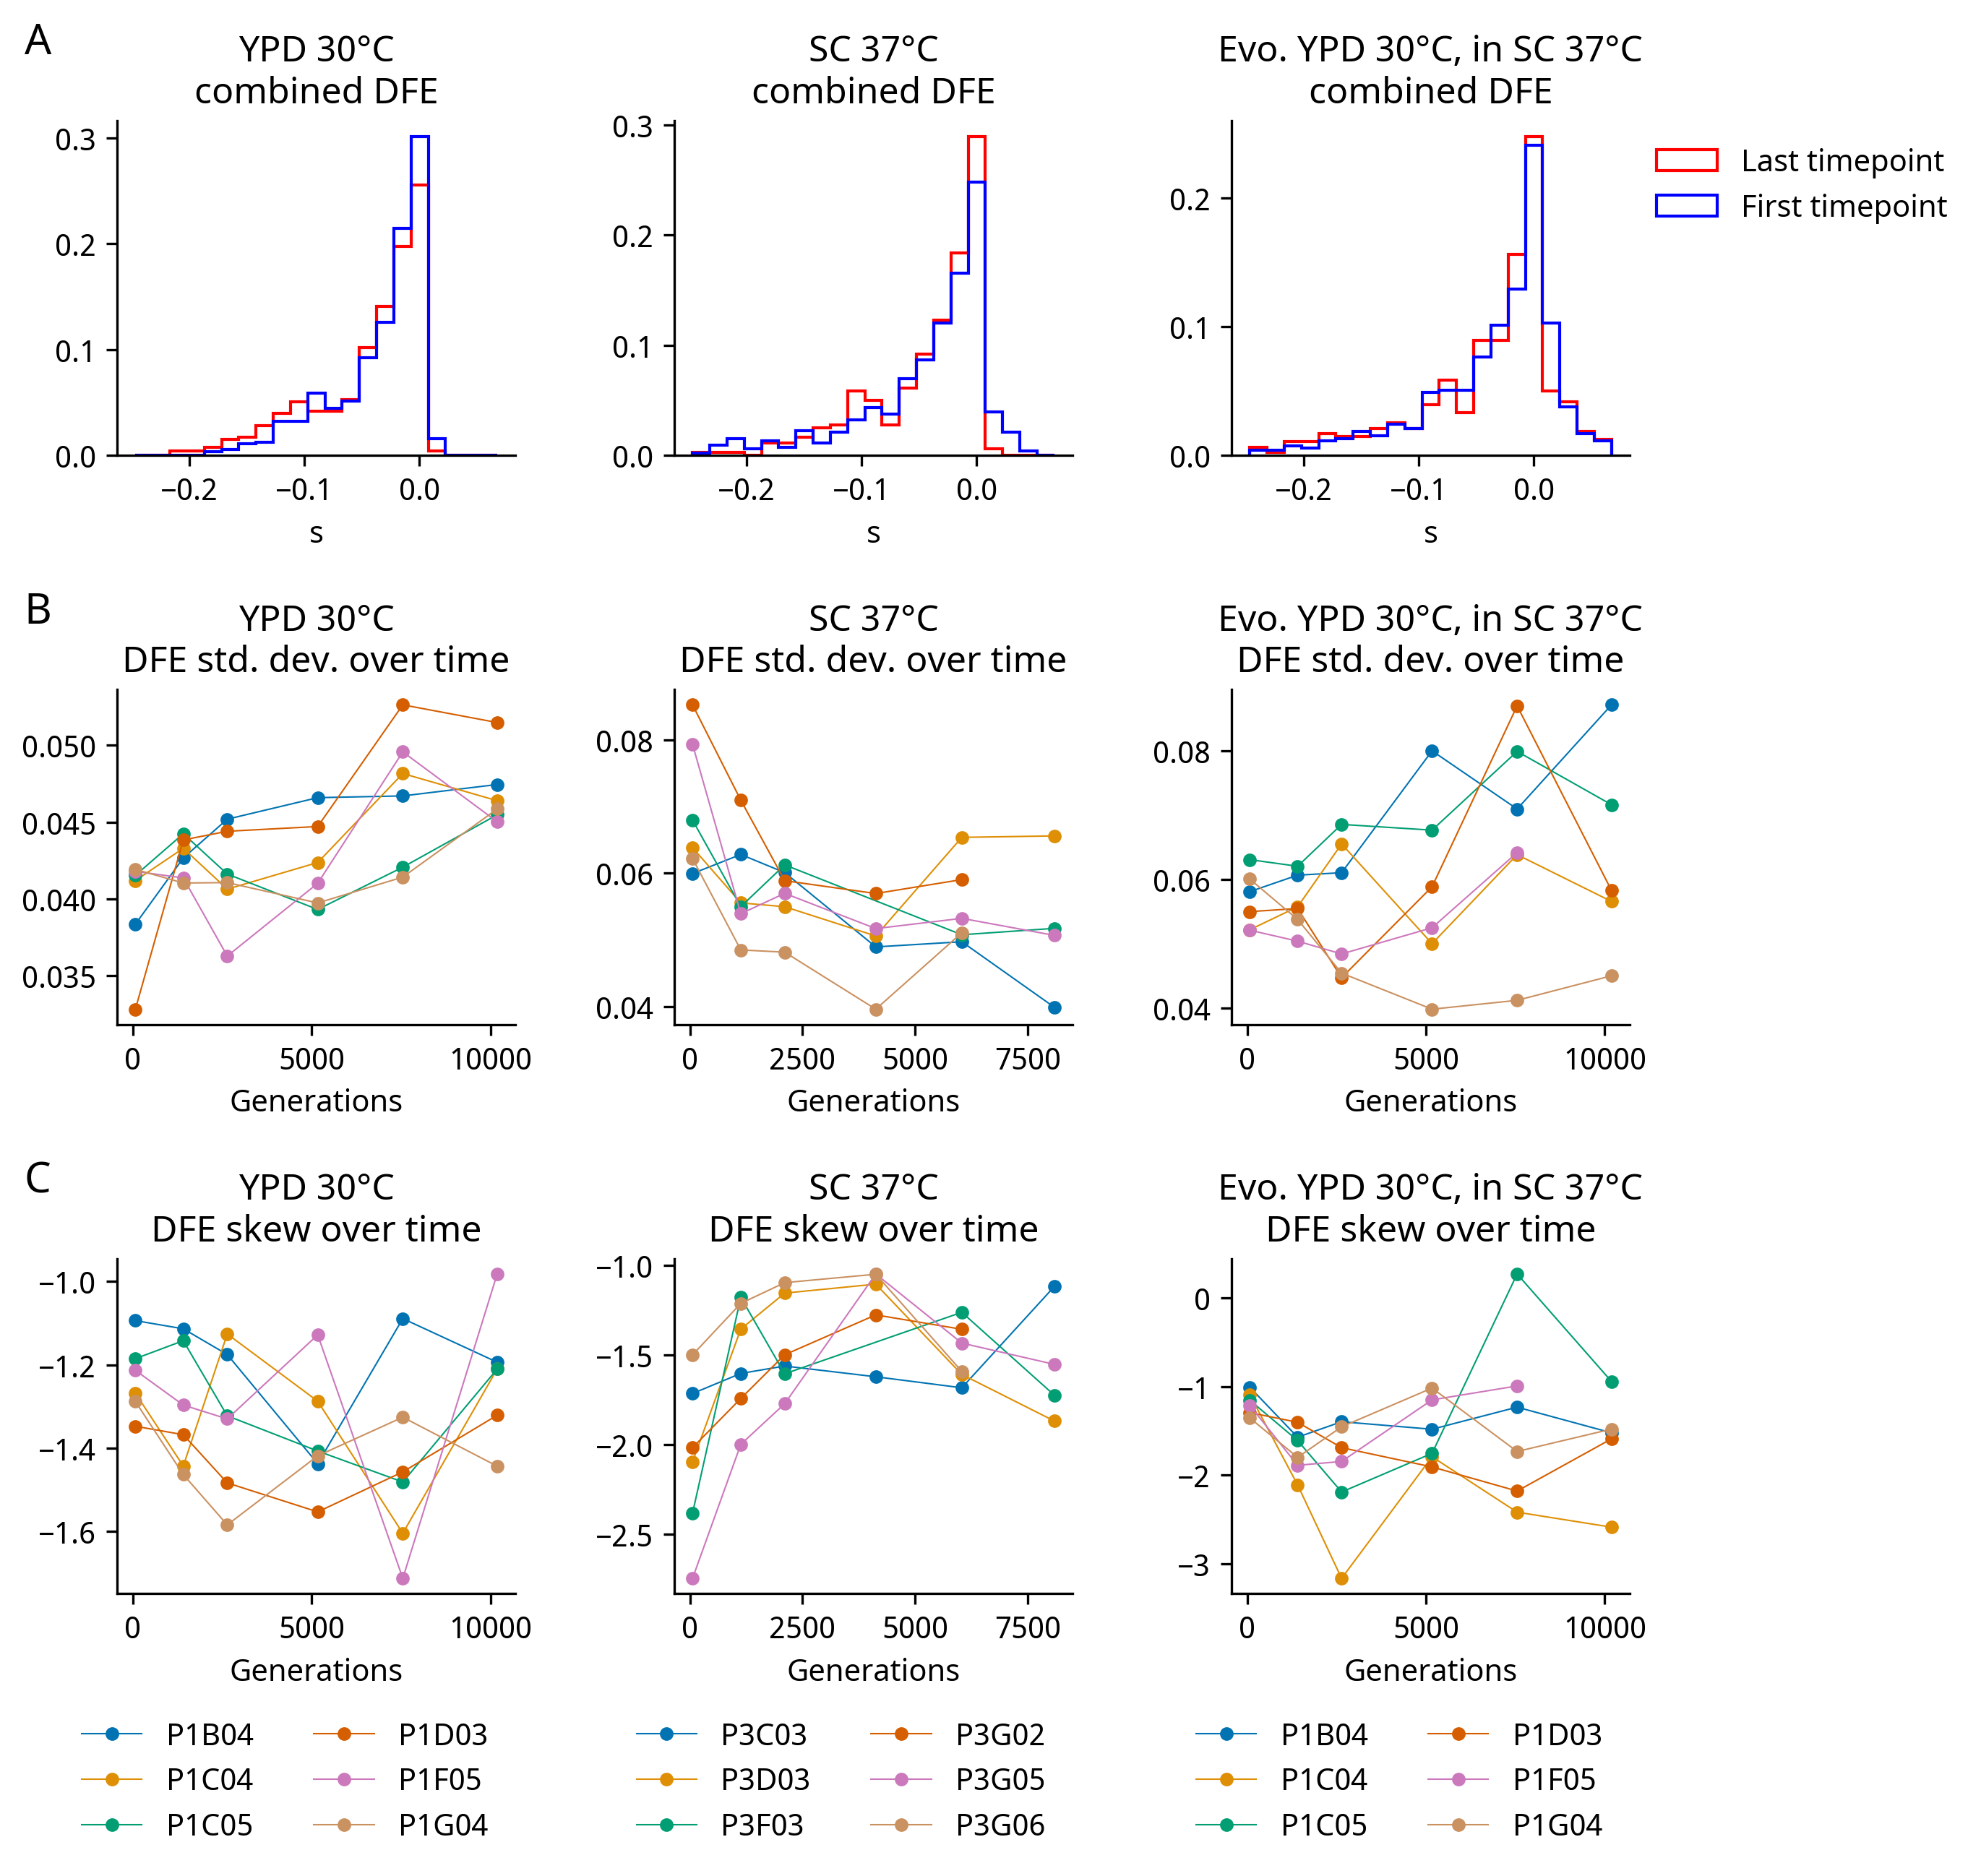

In [7]:
def dfe_stats_plots(dfe_df, s_df, ls='-'):
    fig, subps = pl.subplots(3, 3, figsize=(9,9), dpi=300)
    pl.subplots_adjust(wspace=0.4, hspace=0.7)
    dfe_spot = 0
    std_spot = 1
    skew_spot = 2
    for i in range(3):
        cond = conditions[i]
        td = dfe_df[dfe_df.Cond==cond]
        for pop in cond_pops[cond.split('_')[0]]:
            ttd = td[td.Pop==pop].sort_values('Gen')
            gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
            if sci_stats.linregress(gen_rec, ttd['DFE_std'])[3]<0.05:
                lab = pop+'*'
            else:
                lab = pop
            subps[std_spot][i].plot(gen_rec, ttd['DFE_std'], linestyle='-', marker='.', markersize=7, linewidth=0.5, color=color_map[pop], label=lab)
            subps[skew_spot][i].plot(gen_rec, ttd['DFE_skew'], linestyle='-', marker='.', markersize=7, linewidth=0.5, color=color_map[pop], label=pop)
        subps[std_spot][i].set_title(cond_to_title[cond]+'\nDFE std. dev. over time')
        subps[skew_spot][i].set_title(cond_to_title[cond]+'\nDFE skew over time')
        subps[std_spot][i].set_xlabel('Generations')
        subps[skew_spot][i].set_xlabel('Generations')
        subps[skew_spot][i].legend(frameon=False, bbox_to_anchor=(1, -0.3), ncol=2)
        td = s_df[s_df.Cond==cond]
        bottom_dfe = td[td['Gen']==70]['s']
        top_dfe = td[td['Gen']==10150]['s']
        bin_lefts = [(-16.15+i)*0.015-0.005 for i in range(22)]
        subps[dfe_spot][i].hist(top_dfe, bins=bin_lefts, label='Last timepoint', histtype="step", color="r", weights=np.ones_like(top_dfe)/float(len(top_dfe)))
        subps[dfe_spot][i].hist(bottom_dfe, bins=bin_lefts, label='First timepoint', histtype="step", color="b", weights=np.ones_like(bottom_dfe)/float(len(bottom_dfe)))
        subps[dfe_spot][i].set_title(cond_to_title[cond]+ '\ncombined DFE')
        subps[dfe_spot][i].set_xlabel('s')
    subps[dfe_spot][2].legend(frameon=False, bbox_to_anchor=(1,1))


    subps[0][0].annotate('A', fontsize=14, xy=(-0.2, 1.2), xycoords="axes fraction", horizontalalignment="center")
    subps[1][0].annotate('B', fontsize=14, xy=(-0.2, 1.2), xycoords="axes fraction", horizontalalignment="center")
    subps[2][0].annotate('C', fontsize=14, xy=(-0.2, 1.2), xycoords="axes fraction", horizontalalignment="center")

    sns.despine()
    fig.savefig('../../Figures/supp_figs/DFE_additional_stats.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)
    
dfe_stats_plots(vtn_dfe, vtn_s)

P1_YPD_30C P1B04 0.0009857473592677565
P1_YPD_30C P1C04 0.001958893006707252
P1_YPD_30C P1C05 0.32048010385445524
P1_YPD_30C P1D03 0.003606706140957738
P1_YPD_30C P1F05 0.11078547272554126
P1_YPD_30C P1G04 0.03157525058554672
P1_YPD_30C ALL 3.6422882247463304e-06
P3_SC_37C P3C03 0.4626119044873252
P3_SC_37C P3D03 0.42264403227166897
P3_SC_37C P3F03 0.5408102201731082
P3_SC_37C P3G02 0.07257646869402566
P3_SC_37C P3G05 0.7029867226237592
P3_SC_37C P3G06 0.11029960476589726
P3_SC_37C ALL 0.18427843948075207
P1_SC_37C P1B04 0.5894258916649682
P1_SC_37C P1C04 0.03212435016135673
P1_SC_37C P1C05 0.007394226699226962
P1_SC_37C P1D03 0.44415708299394224
P1_SC_37C P1F05 0.1118635424268595
P1_SC_37C P1G04 0.39567408432839885
P1_SC_37C ALL 0.05350829822611744


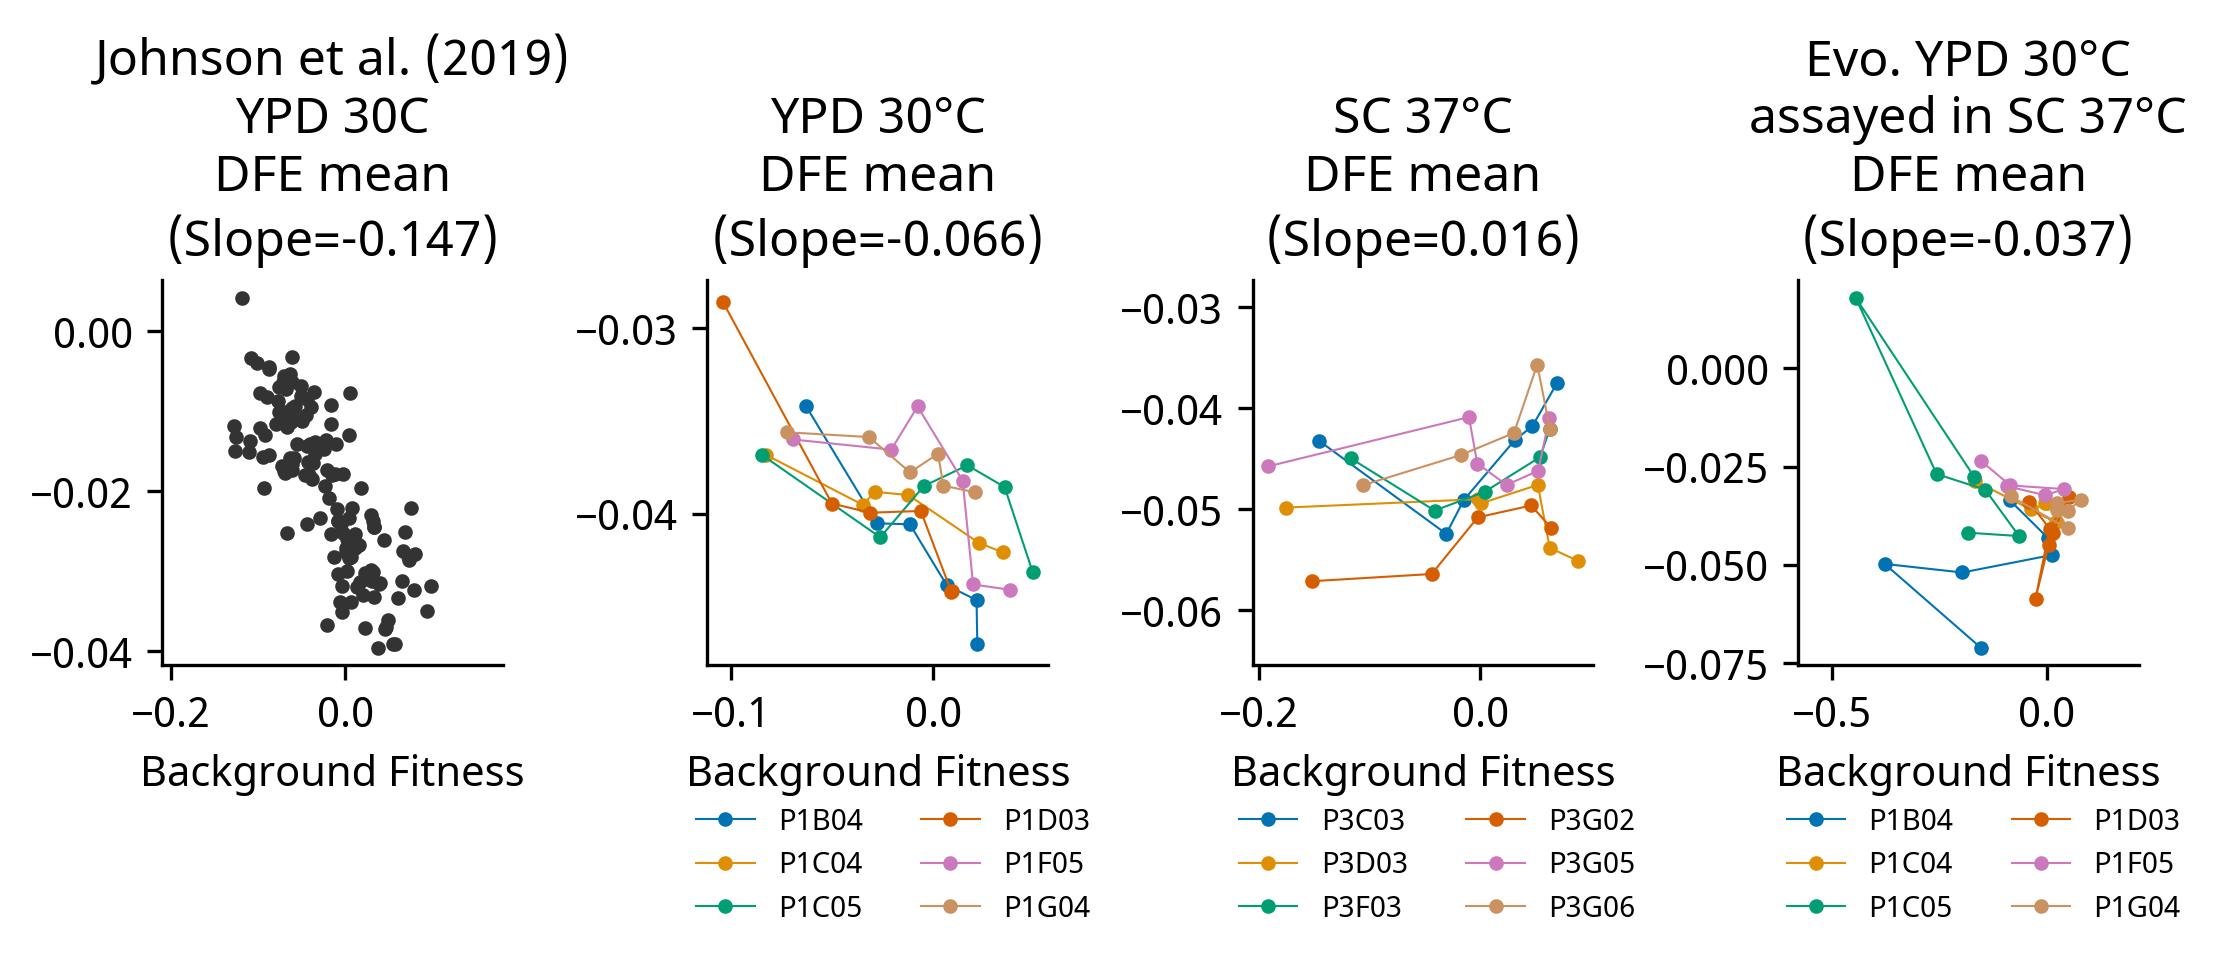

In [9]:
def standardize_aspect(subs):
    aspects = []
    for sub in subs:
        xlim = sub.get_xlim()
        ylim = sub.get_ylim()
        xr = xlim[1]-xlim[0]
        yr = ylim[1]-ylim[0]
        aspects.append(xr/yr)
    #print(aspects)
    ave_aspect = np.mean(aspects)
    for sub in subs:
        xlim = sub.get_xlim()
        ylim = sub.get_ylim()
        xr = xlim[1]-xlim[0]
        yr = ylim[1]-ylim[0]
        a = xr/yr
        if a > ave_aspect:
            new_yr = xr/ave_aspect
            ymid = (ylim[1]+ylim[0])/2
            sub.set_ylim([ymid-new_yr/2, ymid+new_yr/2])
        else:
            new_xr = yr*ave_aspect
            xmid = (xlim[1]+xlim[0])/2
            sub.set_xlim([xmid-new_xr/2, xmid+new_xr/2])
        xlim = sub.get_xlim()
        ylim = sub.get_ylim()
        xr = xlim[1]-xlim[0]
        yr = ylim[1]-ylim[0]
        #print('standard:', xr/yr)

fig, subs = pl.subplots(1, 4, figsize=(8.5,1.7), dpi=300)
pl.subplots_adjust(wspace=0.6)
x_width = 0.55

subs[0].plot(byrm_dfe['Fitness'], byrm_dfe['DFE_mean'], linestyle='', marker='.', markersize=5, linewidth=1, color="#333333")
s = sci_stats.linregress(byrm_dfe['Fitness'], byrm_dfe['DFE_mean'])[0]
subs[0].set_title('Johnson et al. (2019)\nYPD 30C\nDFE mean\n'+f'(Slope={s:.3f})')

for i in range(1, 4):
    td = vtn_dfe[vtn_dfe.Cond==conditions[i-1]]
    all_x = []
    for pop in cond_pops[conditions[i-1].split('_')[0]]:
        ttd = td[td.Pop==pop].sort_values('Gen')
        all_x += [i for i in ttd['Fitness'] if not pd.isnull(i)]
        subs[i].plot(ttd['Fitness'], ttd['DFE_mean'], linestyle='-', marker='.', markersize=5, linewidth=0.5, color=color_map[pop], label=pop)
        print(conditions[i-1], pop, sci_stats.linregress(ttd['Fitness'], ttd['DFE_mean'])[3])
    print(conditions[i-1], 'ALL', sci_stats.linregress(td['Fitness'], td['DFE_mean'])[3])
    s = sci_stats.linregress(td['Fitness'], td['DFE_mean'])[0]
    subs[i].set_title(cond_to_title[conditions[i-1]].replace(', ', '\nassayed ')+'\nDFE mean\n'+f'(Slope={s:.3f})')
    subs[i].legend(frameon=False, bbox_to_anchor=(1.2, -0.3), ncol=2, fontsize=7)
sns.despine()
standardize_aspect(subs)
for i in range(4):
    subs[i].set_xlabel('Background Fitness')
fig.savefig('../../Figures/supp_figs/DFE_Fitness_S2.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)

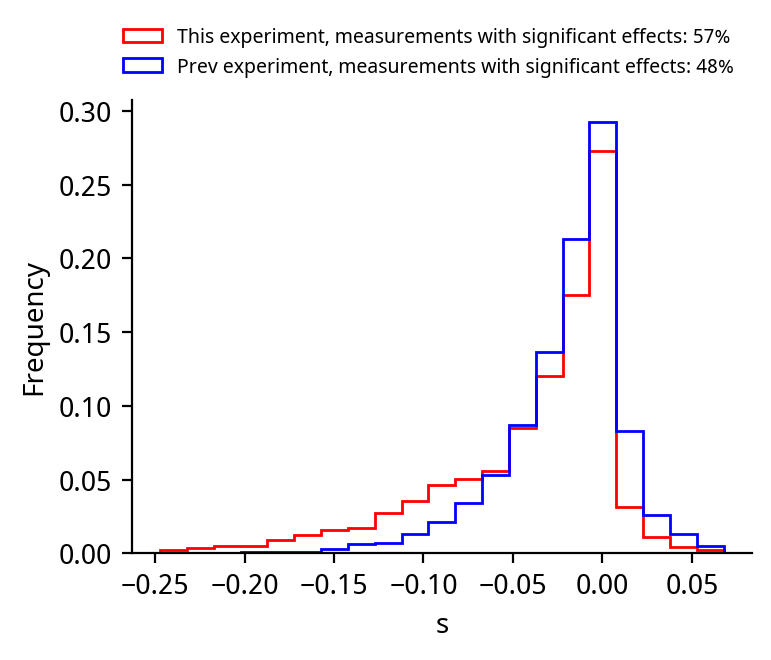

In [14]:
bin_lefts = [(-16.15+i)*0.015-0.005 for i in range(22)]
sn = [i for i in vtn_s['s'] if pd.notnull(i)]
so = [i for i in byrm_s['s'] if pd.notnull(i)]
fig, sub = pl.subplots(1, 1, figsize=(4, 3), dpi=200)
pl.hist(sn, bins=bin_lefts, label=f'This experiment, measurements with significant effects: {100*len(vtn_s[vtn_s.sig])/len(vtn_s):.0f}%', histtype="step", color="r", weights=np.ones_like(sn)/float(len(sn)))
pl.hist(so, bins=bin_lefts, label=f'Prev experiment, measurements with significant effects: {100*len(byrm_s[byrm_s.sig])/len(byrm_s):.0f}%', histtype="step", color="b", weights=np.ones_like(so)/float(len(so)))
sns.despine()
pl.legend(bbox_to_anchor=(1, 1.2), frameon=False, fontsize=7)
pl.xlabel('s')
pl.ylabel('Frequency')
fig.savefig('../../Figures/supp_figs/DFE_experiment_compare.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)

In [10]:
for cond in conditions:
    td = vtn_dfe[(vtn_dfe.Cond==cond) & (vtn_dfe['shared_DFE_count']>=40)]
    print(cond, 'Shared mutations:', td['shared_DFE_count'].drop_duplicates().iloc[0], 'strains:', len(td))
print('By clone data:')
for cond in conditions:
    td = vtn_clones_dfe[(vtn_clones_dfe.Cond==cond) & (vtn_clones_dfe['shared_DFE_count']>=40)]
    print(cond, 'Shared mutations:', td['shared_DFE_count'].drop_duplicates().iloc[0], 'strains:', len(td))

P1_YPD_30C Shared mutations: 68 strains: 36
P3_SC_37C Shared mutations: 57 strains: 33
P1_SC_37C Shared mutations: 47 strains: 35
By clone data:
P1_YPD_30C Shared mutations: 42 strains: 62
P3_SC_37C Shared mutations: 40 strains: 44
P1_SC_37C Shared mutations: 40 strains: 51


In [9]:
def other_regression(dfe_df):
    for i in range(2):
        cond = conditions[i]
        td = dfe_df[dfe_df.Cond==cond]
        gens = sorted(set(td.Gen))
        for i in range(5):
            ttd = td[td.Gen>=gens[i]]
            print(i, len(ttd), cond, 'All, Gen', sci_stats.linregress(ttd['Gen'], ttd['DFE_mean'])[3])
            print(i, len(ttd), cond, 'All, Fitness', sci_stats.linregress(ttd['Fitness'], ttd['DFE_mean'])[3])

other_regression(vtn_dfe)

0 36 P1_YPD_30C All, Gen 1.9927335101475135e-06
0 36 P1_YPD_30C All, Fitness 3.6422882247463304e-06
1 30 P1_YPD_30C All, Gen 0.00039105197837422924
1 30 P1_YPD_30C All, Fitness 0.011883335590484564
2 24 P1_YPD_30C All, Gen 0.0009361277671629634
2 24 P1_YPD_30C All, Fitness 0.02772811252690614
3 18 P1_YPD_30C All, Gen 0.017584343717232907
3 18 P1_YPD_30C All, Fitness 0.19694638422634098
4 12 P1_YPD_30C All, Gen 0.41905430440192315
4 12 P1_YPD_30C All, Fitness 0.9410220639158904
0 33 P3_SC_37C All, Gen 0.12560163113497894
0 33 P3_SC_37C All, Fitness 0.18427843948075207
1 27 P3_SC_37C All, Gen 0.16270216649362673
1 27 P3_SC_37C All, Fitness 0.1031379463465535
2 21 P3_SC_37C All, Gen 0.40775668895557216
2 21 P3_SC_37C All, Fitness 0.5181320706969685
3 15 P3_SC_37C All, Gen 0.8659339054655175
3 15 P3_SC_37C All, Fitness 0.46304977514038337
4 10 P3_SC_37C All, Gen 0.4984985440184756
4 10 P3_SC_37C All, Fitness 0.21202750204165757
